In [7]:
df

,Date,R2,M2,P2
0,1/2/1995,1.063,1.159,1.250
1,1/9/1995,1.070,1.164,1.256
2,1/16/1995,1.062,1.155,1.249
3,1/23/1995,1.068,1.165,1.256
4,1/30/1995,1.068,1.163,1.255
...,...,...,...,...
1356,12/28/2020,2.158,2.482,2.770
1357,1/4/2021,2.160,2.484,2.771
1358,1/11/2021,2.232,2.550,2.839
1359,1/18/2021,2.285,2.601,2.885


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Bước 1: Đọc dữ liệu từ file CSV
data = pd.read_csv('OneDrive - Trường ĐH CNTT - University of Information Technology/ĐẠI HỌC/Phan tich Du lieu Kinh doanh/đồ án cuối kfi/PET_PRI_GND_DCUS_NUS_W.csv')

# Bước 2: Chuẩn bị dữ liệu
X = data[['M2', 'P2']]
y = data['R2']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Huấn luyện mô hình
rdf_regressor = RandomForestRegressor(
    max_depth=3,
    max_leaf_nodes=16,
    min_samples_split=10,
    min_samples_leaf=10
)
rdf_regressor.fit(X_train, y_train)

# Dự báo trên tập test
y_pred = rdf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.03f}'.format(mse))
#Đây là chỉ số đo lường độ chính xác của mô hình. MSE càng thấp nghĩa là mô hình dự đoán càng gần với giá trị thực tế. Trong trường hợp ...
# ...của bạn, MSE = 0.009 cho thấy rằng mô hình đã thực hiện khá tốt trong việc dự đoán giá R2, với độ sai lệch trung bình khá nhỏ.

# Bước 4: Dự đoán giá R2 trong tương lai
# Tạo dữ liệu tương lai (thay thế bằng giá trị thực tế hoặc dự đoán cho M2 và P2)
# lấy giá trị trung bình từ dữ liệu hiện tại
mean_M2 = data['M2'].mean()
mean_P2 = data['P2'].mean()

future_data = pd.DataFrame({
    'M2': [mean_M2],  
    'P2': [mean_P2]   
})


# Dự đoán giá R2
future_price = rdf_regressor.predict(future_data)
print('Dự đoán giá R2 trong tương lai:', future_price[0])


Mean Squared Error: 0.008
Dự đoán giá R2 trong tương lai: 2.189632739680523


# RANDOM FOREST REGRESSION

### thuộc tính R2

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu từ file CSV
data = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Đảm bảo cột 'Date' là kiểu datetime
# data.set_index('Date', inplace=True)
print(data)

           Date     R2     M2     P2
0    1995-01-02  1.063  1.159  1.250
1    1995-01-09  1.070  1.164  1.256
2    1995-01-16  1.062  1.155  1.249
3    1995-01-23  1.068  1.165  1.256
4    1995-01-30  1.068  1.163  1.255
...         ...    ...    ...    ...
1356 2020-12-28  2.158  2.482  2.770
1357 2021-01-04  2.160  2.484  2.771
1358 2021-01-11  2.232  2.550  2.839
1359 2021-01-18  2.285  2.601  2.885
1360 2021-01-25  2.298  2.615  2.900

[1361 rows x 4 columns]


In [68]:
datar2 = data.drop(columns = ['M2', 'P2'])
print(datar2)

           Date     R2
0    1995-01-02  1.063
1    1995-01-09  1.070
2    1995-01-16  1.062
3    1995-01-23  1.068
4    1995-01-30  1.068
...         ...    ...
1356 2020-12-28  2.158
1357 2021-01-04  2.160
1358 2021-01-11  2.232
1359 2021-01-18  2.285
1360 2021-01-25  2.298

[1361 rows x 2 columns]


In [70]:

# Giả sử 'Price' là cột chứa giá dầu, bạn có thể cần điều chỉnh theo dataset của mình
# Tách dữ liệu từ 2000 đến 2015 làm tập huấn luyện và từ 2015 đến 2020 làm tập kiểm tra
train_datar2 = datar2.loc[(datar2['Date'].dt.year >= 1995) & (datar2['Date'].dt.year <= 2015)]
test_datar2 = datar2.loc[(datar2['Date'].dt.year > 2015) & (datar2['Date'].dt.year <= 2021)]

print(test_datar2)
print(train_datar2)


           Date     R2
1096 2016-01-04  1.922
1097 2016-01-11  1.888
1098 2016-01-18  1.810
1099 2016-01-25  1.752
1100 2016-02-01  1.729
...         ...    ...
1356 2020-12-28  2.158
1357 2021-01-04  2.160
1358 2021-01-11  2.232
1359 2021-01-18  2.285
1360 2021-01-25  2.298

[265 rows x 2 columns]
           Date     R2
0    1995-01-02  1.063
1    1995-01-09  1.070
2    1995-01-16  1.062
3    1995-01-23  1.068
4    1995-01-30  1.068
...         ...    ...
1091 2015-11-30  1.974
1092 2015-12-07  1.969
1093 2015-12-14  1.953
1094 2015-12-21  1.929
1095 2015-12-28  1.933

[1096 rows x 2 columns]


In [72]:

# Chuẩn bị tập huấn luyện và kiểm tra
X_train = train_datar2.drop(columns=['R2'])
y_train = train_datar2['R2']
X_test = test_datar2.drop(columns=['R2'])
y_test = test_datar2['R2']


print(f'X train là:\n{X_train}')
print(f'y train là:\n{y_train}')
print(f'X test là:\n{X_test}')
print(f'y test là:\n{y_test}')



X train là:
           Date
0    1995-01-02
1    1995-01-09
2    1995-01-16
3    1995-01-23
4    1995-01-30
...         ...
1091 2015-11-30
1092 2015-12-07
1093 2015-12-14
1094 2015-12-21
1095 2015-12-28

[1096 rows x 1 columns]
y train là:
0       1.063
1       1.070
2       1.062
3       1.068
4       1.068
        ...  
1091    1.974
1092    1.969
1093    1.953
1094    1.929
1095    1.933
Name: R2, Length: 1096, dtype: float64
X test là:
           Date
1096 2016-01-04
1097 2016-01-11
1098 2016-01-18
1099 2016-01-25
1100 2016-02-01
...         ...
1356 2020-12-28
1357 2021-01-04
1358 2021-01-11
1359 2021-01-18
1360 2021-01-25

[265 rows x 1 columns]
y test là:
1096    1.922
1097    1.888
1098    1.810
1099    1.752
1100    1.729
        ...  
1356    2.158
1357    2.160
1358    2.232
1359    2.285
1360    2.298
Name: R2, Length: 265, dtype: float64


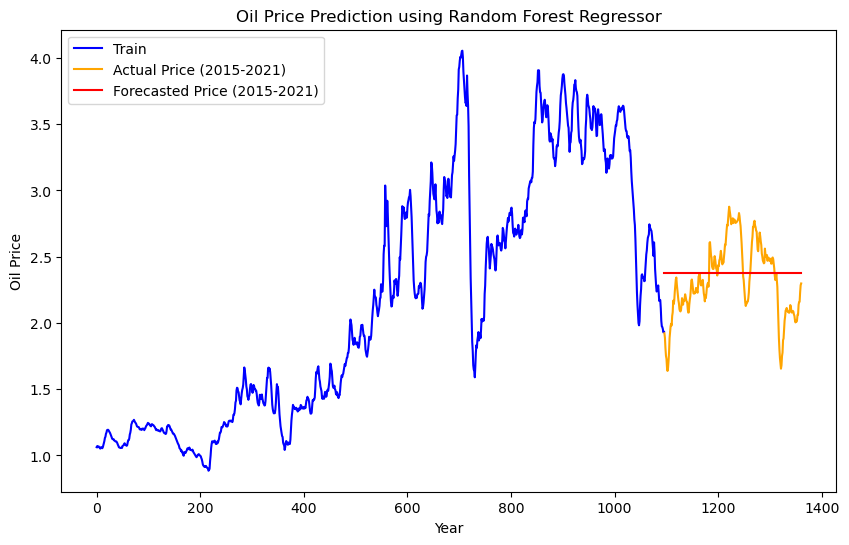

In [74]:
# Bước 2: Huấn luyện mô hình
rdf_regressor = RandomForestRegressor(
    max_depth=3,
    max_leaf_nodes=16,
    min_samples_split=10,
    min_samples_leaf=10
)
rdf_regressor.fit(X_train, y_train)

# Bước 3: Dự báo giá dầu từ 2015 đến 2021
y_pred = rdf_regressor.predict(X_test)

# Bước 4: So sánh kết quả dự báo với giá trị thực tế
plt.figure(figsize=(10, 6))

# Vẽ tập huấn luyện
plt.plot(train_datar2.index, y_train, label='Train', color='blue')

# Vẽ dữ liệu thực tế từ 2015 đến 2020
plt.plot(test_datar2.index, y_test, label='Actual Price (2015-2021)', color='orange')

# Vẽ dự báo từ 2015 đến 2020
plt.plot(test_datar2.index, y_pred, label='Forecasted Price (2015-2021)', color='red')

plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Oil Price Prediction using Random Forest Regressor')
plt.legend()
plt.show()


In [76]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred)
print(f'mean quared error là {mse}')

mean quared error là 0.0812580282607789


### thuộc tính M2

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu từ file CSV
data = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Đảm bảo cột 'Date' là kiểu datetime
# data.set_index('Date', inplace=True)

data_m2 = data.drop(columns = ['R2', 'P2'])

# Giả sử 'Price' là cột chứa giá dầu, bạn có thể cần điều chỉnh theo dataset của mình
# Tách dữ liệu từ 2000 đến 2015 làm tập huấn luyện và từ 2015 đến 2020 làm tập kiểm tra
train_data_m2 = data_m2.loc[(data_m2['Date'].dt.year >= 1995) & (data_m2['Date'].dt.year <= 2015)]
test_data_m2 = data_m2.loc[(data_m2['Date'].dt.year > 2015) & (data_m2['Date'].dt.year <= 2021)]



In [80]:
# Chuẩn bị tập huấn luyện và kiểm tra
X_train = train_data_m2.drop(columns=['M2'])
y_train = train_data_m2['M2']
X_test = test_data_m2.drop(columns=['M2'])
y_test = test_data_m2['M2']

# Bước 2: Huấn luyện mô hình
rdf_regressor = RandomForestRegressor(
    max_depth=3,
    max_leaf_nodes=16,
    min_samples_split=10,
    min_samples_leaf=10
)
rdf_regressor.fit(X_train, y_train)




RandomForestRegressor(max_depth=3, max_leaf_nodes=16, min_samples_leaf=10,
                      min_samples_split=10)

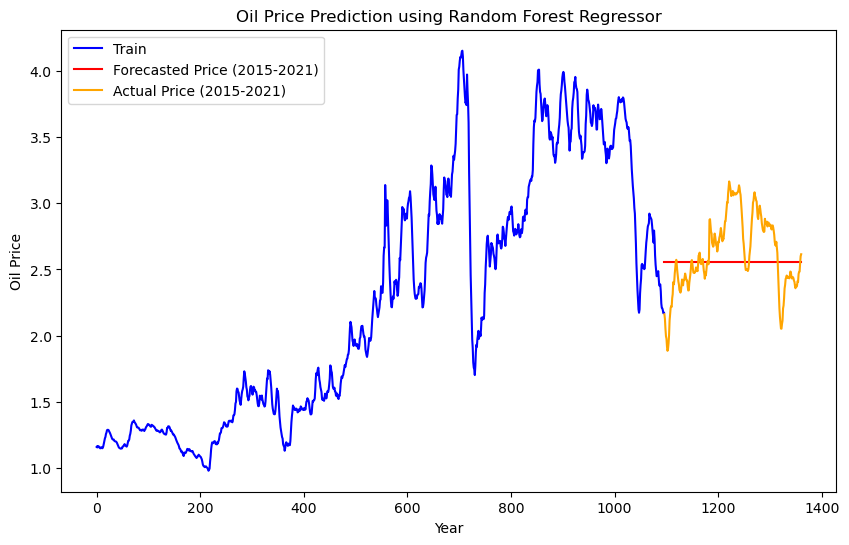

In [86]:
# Bước 3: Dự báo giá dầu từ 2015 đến 2021
y_pred = rdf_regressor.predict(X_test)

# Bước 4: So sánh kết quả dự báo với giá trị thực tế
plt.figure(figsize=(10, 6))

# Vẽ tập huấn luyện
plt.plot(train_data_m2.index, y_train, label='Train', color='blue')

# Vẽ dự báo từ 2015 đến 2021
plt.plot(test_data_m2.index, y_pred, label='Forecasted Price (2015-2021)', color='red')

# Vẽ dữ liệu thực tế từ 2015 đến 2021
plt.plot(test_data_m2.index, y_test, label='Actual Price (2015-2021)', color='orange')



plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Oil Price Prediction using Random Forest Regressor')
plt.legend()
plt.show()

In [58]:
%reset -f

### thuộc tính P2

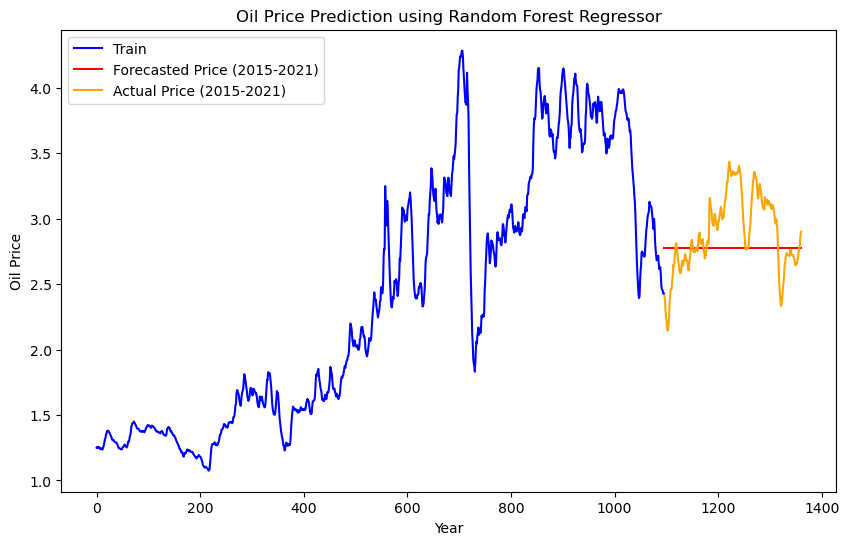

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu từ file CSV
data = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Đảm bảo cột 'Date' là kiểu datetime
# data.set_index('Date', inplace=True)

data_p2 = data.drop(columns = ['R2', 'M2'])

# Giả sử 'Price' là cột chứa giá dầu, bạn có thể cần điều chỉnh theo dataset của mình
# Tách dữ liệu từ 2000 đến 2015 làm tập huấn luyện và từ 2015 đến 2020 làm tập kiểm tra
train_data_p2 = data_p2.loc[(data_p2['Date'].dt.year >= 1995) & (data_p2['Date'].dt.year <= 2015)]
test_data_p2 = data_p2.loc[(data_p2['Date'].dt.year > 2015) & (data_p2['Date'].dt.year <= 2021)]

# Chuẩn bị tập huấn luyện và kiểm tra
X_train = train_data_p2.drop(columns=['P2'])
y_train = train_data_p2['P2']
X_test = test_data_p2.drop(columns=['P2'])
y_test = test_data_p2['P2']

# Bước 2: Huấn luyện mô hình
rdf_regressor = RandomForestRegressor(
    max_depth=3,
    max_leaf_nodes=16,
    min_samples_split=10,
    min_samples_leaf=10
)
rdf_regressor.fit(X_train, y_train)


# Bước 3: Dự báo giá dầu từ 2015 đến 2021
y_pred = rdf_regressor.predict(X_test)

# Bước 4: So sánh kết quả dự báo với giá trị thực tế
plt.figure(figsize=(10, 6))

# Vẽ tập huấn luyện
plt.plot(train_data_p2.index, y_train, label='Train', color='blue')

# Vẽ dự báo từ 2015 đến 2021
plt.plot(test_data_p2.index, y_pred, label='Forecasted Price (2015-2021)', color='red')

# Vẽ dữ liệu thực tế từ 2015 đến 2021
plt.plot(test_data_p2.index, y_test, label='Actual Price (2015-2021)', color='orange')



plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Oil Price Prediction using Random Forest Regressor')
plt.legend()
plt.show()

# LINEAR REGRESSION 


### thuộc tính R2

,Date,R2,M2,P2
0,1995-01-02,1.063,1.159,1.250
1,1995-01-09,1.070,1.164,1.256
2,1995-01-16,1.062,1.155,1.249
3,1995-01-23,1.068,1.165,1.256
4,1995-01-30,1.068,1.163,1.255
...,...,...,...,...
1356,2020-12-28,2.158,2.482,2.770
1357,2021-01-04,2.160,2.484,2.771
1358,2021-01-11,2.232,2.550,2.839
1359,2021-01-18,2.285,2.601,2.885


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Chuyển 'Date' sang dạng datetime

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra dựa trên năm
subdataset_for_train = df.loc[(df['Date'].dt.year >= 1995) & (df['Date'].dt.year <= 2015)]
subdataset_for_test = df.loc[(df['Date'].dt.year > 2015) & (df['Date'].dt.year <= 2021)]

# Sau khi tách tập dữ liệu. Chuyển đổi 'Date' sang giá trị số (ví dụ: số thứ tự ngày) để mô hình có thể sử dụng (linear regression 
# ...ko xử lý trực tiếp dữ liệu kiểu datetime)
subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295
# Chuyển từ số thứ tự về dạng datetime: date = pd.to_datetime(728295, origin='julian', unit='D') ==> lúc này 728295 thành 1995-1-2

# Tạo tập huấn luyện và tập kiểm tra
X_train = subdataset_for_train.drop(columns=['R2']).astype(float)  # Chuyển toàn bộ X_train sang float
y_train = subdataset_for_train['R2']
X_test = subdataset_for_test.drop(columns=['R2']).astype(float)    # Chuyển toàn bộ X_test sang float
y_test = subdataset_for_test['R2']

# Huấn luyện mô hình hồi quy tuyến tính
lm = LinearRegression()  
lm.fit(X_train, y_train)

# Dự đoán với tập kiểm tra
y_pred = lm.predict(X_test)
print(y_pred)

[1.92975513 1.89023688 1.81569965 1.75929904 1.7381024  1.67666384
 1.64432205 1.66896028 1.7145729  1.78027565 1.89226585 1.93738514
 1.98382035 2.00115879 1.99293748 2.06053208 2.09185344 2.18463777
 2.16432539 2.18859363 2.25108861 2.29361679 2.34087459 2.35934395
 2.30043483 2.25386345 2.21138409 2.1760812  2.14966162 2.11051336
 2.10153114 2.0904104  2.10982568 2.14386148 2.19451205 2.16149193
 2.14060362 2.18206255 2.18208696 2.20962463 2.23358453 2.21541066
 2.19226051 2.17817867 2.1738644  2.1221934  2.09941325 2.099376
 2.15267933 2.18393903 2.21828316 2.25961875 2.31166784 2.32812202
 2.30106484 2.26273918 2.2260587  2.22834496 2.23655342 2.23355507
 2.24567056 2.27296156 2.24874216 2.25398952 2.24589155 2.29950322
 2.36798207 2.36675222 2.38598251 2.34564167 2.30020121 2.29732619
 2.32700237 2.31978866 2.3399032  2.29452441 2.25229172 2.22492621
 2.18773147 2.2384437  2.21510856 2.24813677 2.29023328 2.30537154
 2.3206948  2.29238337 2.34177968 2.62349756 2.62855992 2.576004

C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\3675362179.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\3675362179.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295


In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'mse là: {mse}')

mse là: 0.004407965802330199


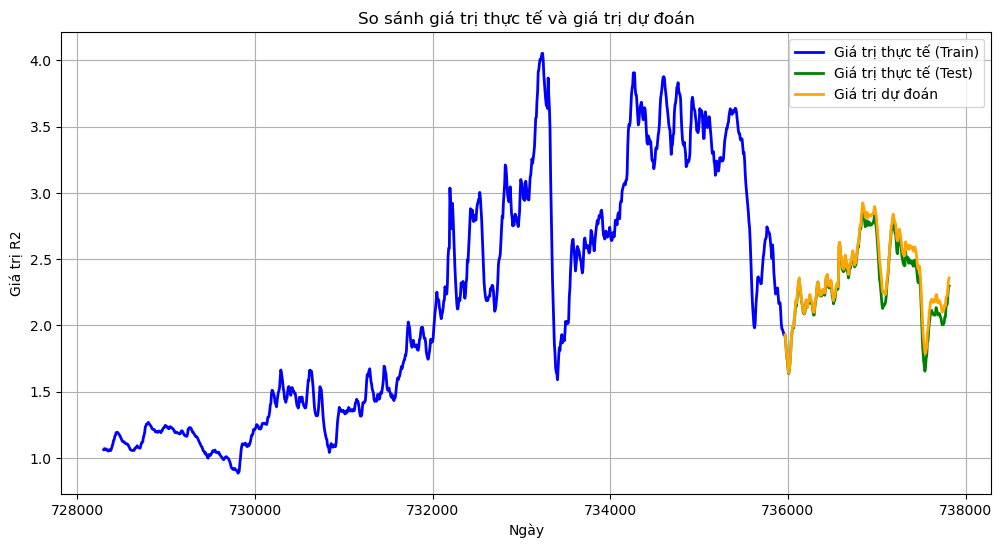

In [23]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))

# Vẽ đường cho giá trị thực tế của tập huấn luyện
plt.plot(subdataset_for_train['Date'].reset_index(drop=True), y_train.reset_index(drop=True), label='Giá trị thực tế (Train)', color='blue', linewidth=2)

# Vẽ đường cho giá trị thực tế của tập kiểm tra
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_test.reset_index(drop=True), label='Giá trị thực tế (Test)', color='green', linewidth=2)

# Vẽ đường cho giá trị dự đoán
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_pred, label='Giá trị dự đoán', color='orange', linewidth=2)

plt.xlabel('Ngày')
plt.ylabel('Giá trị R2')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.legend()
plt.grid(True)
plt.show()

### thuộc tính M2

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Chuyển 'Date' sang dạng datetime

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra dựa trên năm
subdataset_for_train = df.loc[(df['Date'].dt.year >= 1995) & (df['Date'].dt.year <= 2015)]
subdataset_for_test = df.loc[(df['Date'].dt.year > 2015) & (df['Date'].dt.year <= 2021)]

# Sau khi tách tập dữ liệu. Chuyển đổi 'Date' sang giá trị số (ví dụ: số thứ tự ngày) để mô hình có thể sử dụng (linear regression 
# ...ko xử lý trực tiếp dữ liệu kiểu datetime)
subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295
# Chuyển từ số thứ tự về dạng datetime: date = pd.to_datetime(728295, origin='julian', unit='D') ==> lúc này 728295 thành 1995-1-2

# Tạo tập huấn luyện và tập kiểm tra
X_train = subdataset_for_train.drop(columns=['M2']).astype(float)  # Chuyển toàn bộ X_train sang float
y_train = subdataset_for_train['M2']
X_test = subdataset_for_test.drop(columns=['M2']).astype(float)    # Chuyển toàn bộ X_test sang float
y_test = subdataset_for_test['M2']

# Huấn luyện mô hình hồi quy tuyến tính
lm = LinearRegression()  
lm.fit(X_train, y_train)

# Dự đoán với tập kiểm tra
y_pred = lm.predict(X_test)
print(y_pred)

[2.15916622 2.1268517  2.0512121  1.99444757 1.97362606 1.91047617
 1.88395552 1.89998217 1.94478871 2.0073168  2.11348043 2.16348617
 2.20592358 2.22014314 2.2129943  2.28103524 2.30898957 2.39774213
 2.37863298 2.40288155 2.46606322 2.50660198 2.55554894 2.56677841
 2.51976188 2.48093781 2.44083603 2.40746272 2.38717061 2.34429767
 2.331917   2.3252681  2.33528196 2.37619329 2.4222449  2.4111093
 2.38078816 2.41531413 2.41342977 2.43082568 2.46270468 2.44580784
 2.42286876 2.40796531 2.41019191 2.36417207 2.33301107 2.334522
 2.3917856  2.42547171 2.45594881 2.50147103 2.56571148 2.57307837
 2.54263305 2.50486777 2.47731778 2.47272437 2.47809788 2.47462534
 2.48516859 2.51287454 2.49093215 2.4885184  2.48065389 2.53028707
 2.60004038 2.60606747 2.62252878 2.58323741 2.54142326 2.53536586
 2.55403948 2.55442952 2.5740051  2.52832837 2.48072035 2.45884006
 2.42042119 2.46354482 2.4442494  2.48276213 2.5302451  2.54798412
 2.55787379 2.53206882 2.58089158 2.86829641 2.87373201 2.8255325

C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\1993542568.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\1993542568.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295


In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'mse là: {mse}')

mse là: 0.0008715475747819144


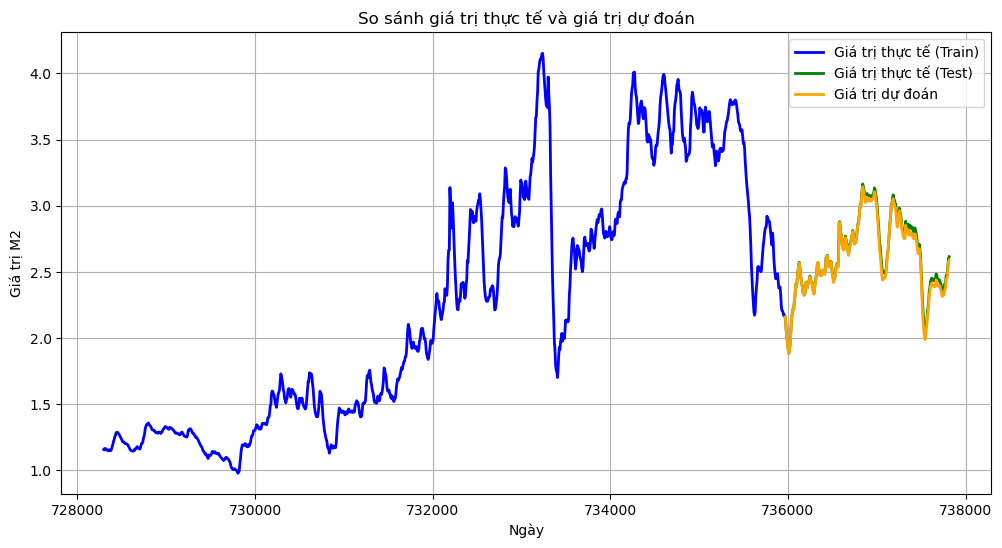

In [29]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))

# Vẽ đường cho giá trị thực tế của tập huấn luyện
plt.plot(subdataset_for_train['Date'].reset_index(drop=True), y_train.reset_index(drop=True), label='Giá trị thực tế (Train)', color='blue', linewidth=2)

# Vẽ đường cho giá trị thực tế của tập kiểm tra
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_test.reset_index(drop=True), label='Giá trị thực tế (Test)', color='green', linewidth=2)

# Vẽ đường cho giá trị dự đoán
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_pred, label='Giá trị dự đoán', color='orange', linewidth=2)

plt.xlabel('Ngày')
plt.ylabel('Giá trị M2')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
%reset -f

### thuộc tính P2

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Chuyển 'Date' sang dạng datetime

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra dựa trên năm
subdataset_for_train = df.loc[(df['Date'].dt.year >= 1995) & (df['Date'].dt.year <= 2015)]
subdataset_for_test = df.loc[(df['Date'].dt.year > 2015) & (df['Date'].dt.year <= 2021)]

# Sau khi tách tập dữ liệu. Chuyển đổi 'Date' sang giá trị số (ví dụ: số thứ tự ngày) để mô hình có thể sử dụng (linear regression 
# ...ko xử lý trực tiếp dữ liệu kiểu datetime)
subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295
# Chuyển từ số thứ tự về dạng datetime: date = pd.to_datetime(728295, origin='julian', unit='D') ==> lúc này 728295 thành 1995-1-2

# Tạo tập huấn luyện và tập kiểm tra
X_train = subdataset_for_train.drop(columns=['P2']).astype(float)  # Chuyển toàn bộ X_train sang float
y_train = subdataset_for_train['P2']
X_test = subdataset_for_test.drop(columns=['P2']).astype(float)    # Chuyển toàn bộ X_test sang float
y_test = subdataset_for_test['P2']

# Huấn luyện mô hình hồi quy tuyến tính
lm = LinearRegression()  
lm.fit(X_train, y_train)

# Dự đoán với tập kiểm tra
y_pred = lm.predict(X_test)
print(y_pred)

[2.4134211  2.37742962 2.30641624 2.25182451 2.23426364 2.1771576
 2.14284291 2.15494313 2.18530964 2.24348906 2.355621   2.4065932
 2.45521893 2.46597807 2.46768533 2.52904871 2.56175637 2.65579165
 2.64543446 2.66524193 2.72509637 2.75847723 2.80944942 2.82087821
 2.77315622 2.72928962 2.69513925 2.66099065 2.63974401 2.60023284
 2.59356319 2.5785184  2.59865805 2.6352211  2.67731458 2.65657151
 2.63733385 2.6824399  2.68582396 2.71132617 2.7361605  2.71994071
 2.69685118 2.68448502 2.68803694 2.64684897 2.61605219 2.61709156
 2.66990841 2.69608382 2.73264511 2.76552416 2.81800706 2.83077517
 2.80249094 2.76783876 2.74290458 2.74176536 2.74699407 2.74484947
 2.75946046 2.78144653 2.75751949 2.76458932 2.76009827 2.80788826
 2.87645532 2.87783041 2.89763611 2.86013568 2.81693874 2.81194589
 2.83326053 2.82424796 2.8487448  2.80873006 2.77307075 2.74813834
 2.70996826 2.75356891 2.73517053 2.77324076 2.82035932 2.8304488
 2.84338476 2.81895415 2.86825132 3.16101427 3.16523761 3.1176834

C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\240650689.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_train['Date'] = subdataset_for_train['Date'].map(pd.Timestamp.toordinal)
C:\Users\hungm\AppData\Local\Temp\ipykernel_10120\240650689.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset_for_test['Date'] = subdataset_for_test['Date'].map(pd.Timestamp.toordinal) # 1995-1-2 thành 728295


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'mse là: {mse}')

mse là: 0.002558960358555729


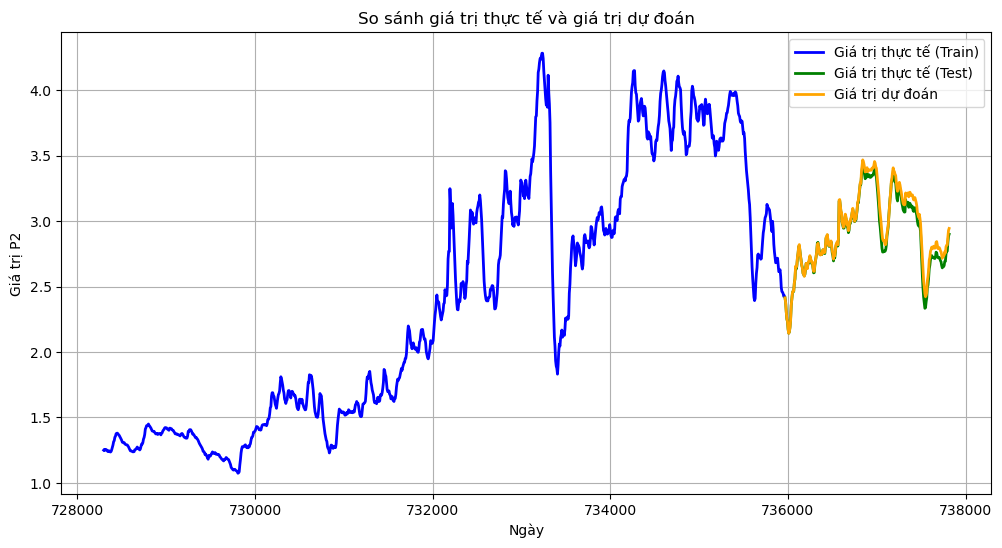

In [46]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))

# Vẽ đường cho giá trị thực tế của tập huấn luyện
plt.plot(subdataset_for_train['Date'].reset_index(drop=True), y_train.reset_index(drop=True), label='Giá trị thực tế (Train)', color='blue', linewidth=2)

# Vẽ đường cho giá trị thực tế của tập kiểm tra
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_test.reset_index(drop=True), label='Giá trị thực tế (Test)', color='green', linewidth=2)

# Vẽ đường cho giá trị dự đoán
plt.plot(subdataset_for_test['Date'].reset_index(drop=True), y_pred, label='Giá trị dự đoán', color='orange', linewidth=2)

plt.xlabel('Ngày')
plt.ylabel('Giá trị P2')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.legend()
plt.grid(True)
plt.show()